In [27]:
import matplotlib.pyplot as plt
from pylab import rcParams

import numpy as np
import scipy.stats as stats

import pickle

# Testing script results

In [28]:
with open('data/multiprocessing_log.pickle', 'rb') as handle:
    log = pickle.load(handle)

In [29]:
sigma1, sigma2, sigma3 = 0.6827, 0.9545, 0.9973
lambda1, lambda2, lambda3 = stats.chi2.ppf(sigma1, 2), stats.chi2.ppf(sigma2, 2), stats.chi2.ppf(sigma3, 2)

In [30]:
test = np.array(log[100]['result'])

C:\Users\lucas.corbanez\AppData\Local\Temp\ipykernel_12300\616874641.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test = np.array(log[100]['result'])


In [31]:
x, y, c = [], [], []
for i in test:
    x.append(i[0][0])
    y.append(i[0][1])
    c.append(10/(1 + 24.4*np.exp(-i[1])))
    
x = x[1::]
y = y[1::]
c = c[1::]

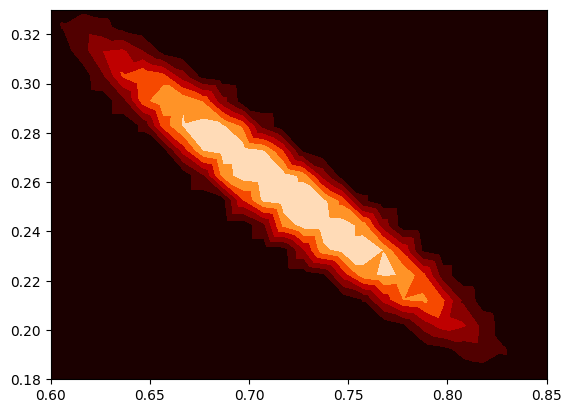

In [32]:
plt.tricontourf(x, y, c, cmap = 'gist_heat_r')

plt.xlim(0.6, 0.85)
plt.ylim(0.18, 0.33)

plt.show()

# Alternative of grid generating

## Generating a grid centered in a seed value

In [39]:
def generate_grid(x, y, z):
    for i in x:
        for j in y:
            for k in z:
                yield (i, j, k)
                
def generate_grid_seed(seed, x = [0], y = [0], z = [0]):
    for i in x:
        for j in y:
            for k in z:
                yield (seed[0], seed[1], seed[2]) + (i, j, k)

In [40]:
grid_size = 5

for i in generate_grid(np.linspace(0, 1, grid_size), np.linspace(0, 1, grid_size), [71]):
    print(i)

(0.0, 0.0, 71)
(0.0, 0.25, 71)
(0.0, 0.5, 71)
(0.0, 0.75, 71)
(0.0, 1.0, 71)
(0.25, 0.0, 71)
(0.25, 0.25, 71)
(0.25, 0.5, 71)
(0.25, 0.75, 71)
(0.25, 1.0, 71)
(0.5, 0.0, 71)
(0.5, 0.25, 71)
(0.5, 0.5, 71)
(0.5, 0.75, 71)
(0.5, 1.0, 71)
(0.75, 0.0, 71)
(0.75, 0.25, 71)
(0.75, 0.5, 71)
(0.75, 0.75, 71)
(0.75, 1.0, 71)
(1.0, 0.0, 71)
(1.0, 0.25, 71)
(1.0, 0.5, 71)
(1.0, 0.75, 71)
(1.0, 1.0, 71)


In [41]:
grid_size = 2

for i in generate_grid_seed(seed = [0.75, 0.25, 71], x = np.linspace(0, 1, grid_size), y = np.linspace(0, 1, grid_size)):
    print(i)

(0.75, 0.25, 71, 0.0, 0.0, 0)
(0.75, 0.25, 71, 0.0, 1.0, 0)
(0.75, 0.25, 71, 1.0, 0.0, 0)
(0.75, 0.25, 71, 1.0, 1.0, 0)


In [152]:
grid_size = 1000
seed = [0.75, 0.25, 71]
radius = 0.4

with_x0 = np.linspace(0.75 - radius, 0.75 + radius, grid_size)
without = np.linspace(0, 1, grid_size)

In [153]:
without_within = []
for i in without:
    if 0.75 - radius < i < 0.75 + radius:
        without_within.append(i)

In [154]:
len(without_within)

650

In [155]:
len(with_x0)

1000